## Datasauras Dozen

In [ ]:
from google.colab import files
uploaded = files.upload()  

Saving DatasaurusDozen.tsv to DatasaurusDozen.tsv


In [ ]:
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['DatasaurusDozen.tsv']), sep='\t')

In [ ]:
data.head()

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


In [ ]:
# How many datasets
len(data['dataset'].unique())

13

In [ ]:
# Check the names of the datasets
data['dataset'].unique()

array(['dino', 'away', 'h_lines', 'v_lines', 'x_shape', 'star',
       'high_lines', 'dots', 'circle', 'bullseye', 'slant_up',
       'slant_down', 'wide_lines'], dtype=object)

In [ ]:
# Summary Statistics for each  dataset
datasets_grouped = data.groupby('dataset')
datasets_grouped.agg(['count', 'mean', 'var', 'std'])

x                                       y             \
           count       mean         var        std count       mean   
dataset                                                               
away         142  54.266100  281.227029  16.769825   142  47.834721   
bullseye     142  54.268730  281.207393  16.769239   142  47.830823   
circle       142  54.267320  280.898024  16.760013   142  47.837717   
dino         142  54.263273  281.069988  16.765142   142  47.832253   
dots         142  54.260303  281.156953  16.767735   142  47.839829   
h_lines      142  54.261442  281.095333  16.765898   142  47.830252   
high_lines   142  54.268805  281.122364  16.766704   142  47.835450   
slant_down   142  54.267849  281.124206  16.766759   142  47.835896   
slant_up     142  54.265882  281.194420  16.768853   142  47.831496   
star         142  54.267341  281.197993  16.768959   142  47.839545   
v_lines      142  54.269927  281.231512  16.769959   142  47.836988   
wide_lines   142  54.266916  281.232887  16.770000   142  47.831602   
x_shape      142  54.260150  281.231481  16.769958   142  47.839717   

                                   
                   var        std  
dataset                            
away        725.749775  26.939743  
bullseye    725.533372  26.935727  
circle      725.226844  26.930036  
dino        725.515961  26.935403  
dots        725.235215  26.930192  
h_lines     725.756931  26.939876  
high_lines  725.763490  26.939998  
slant_down  725.553749  26.936105  
slant_up    725.688605  26.938608  
star        725.239695  26.930275  
v_lines     725.638809  26.937684  
wide_lines  725.650560  26.937902  
x_shape     725.224991  26.930002

As we can see, they all display very similar summary statistics to two decimal places

In [ ]:
# Correlation between X and Y of each dataset
corr = data.groupby('dataset')[['x','y']].corr().iloc[0::2,-1]
corr

dataset      
away        x   -0.064128
bullseye    x   -0.068586
circle      x   -0.068343
dino        x   -0.064472
dots        x   -0.060341
h_lines     x   -0.061715
high_lines  x   -0.068504
slant_down  x   -0.068980
slant_up    x   -0.068609
star        x   -0.062961
v_lines     x   -0.069446
wide_lines  x   -0.066575
x_shape     x   -0.065583
Name: y, dtype: float64

Again, the datasets have similar correlation coefficient to two decimal places. Since this coefficient is close to zero, we can conclude there’s not much of a relationship between the X and Y variables. 

In [ ]:
# Covariance matrix for each  dataset
cov_matrix = data.groupby('dataset').cov()
cov_matrix

x           y
dataset                             
away       x  281.227029  -28.971572
           y  -28.971572  725.749775
bullseye   x  281.207393  -30.979902
           y  -30.979902  725.533372
circle     x  280.898024  -30.846620
           y  -30.846620  725.226844
dino       x  281.069988  -29.113933
           y  -29.113933  725.515961
dots       x  281.156953  -27.247681
           y  -27.247681  725.235215
h_lines    x  281.095333  -27.874816
           y  -27.874816  725.756931
high_lines x  281.122364  -30.943012
           y  -30.943012  725.763490
slant_down x  281.124206  -31.153399
           y  -31.153399  725.553749
slant_up   x  281.194420  -30.992806
           y  -30.992806  725.688605
star       x  281.197993  -28.432772
           y  -28.432772  725.239695
v_lines    x  281.231512  -31.371608
           y  -31.371608  725.638809
wide_lines x  281.232887  -30.075267
           y  -30.075267  725.650560
x_shape    x  281.231481  -29.618418
           y  -29.618418  725.224991

Once more, the thirteen datasets display the exact same covariance matrix.

In [ ]:
# Linear Regression for each of these datasets
from scipy import stats

lr_datasets = datasets_grouped.apply(lambda x: stats.linregress(data['x'], data['y']))
lr_datasets

dataset
away          (-0.10605278140465743, 53.590127125108516, -0....
bullseye      (-0.10605278140465743, 53.590127125108516, -0....
circle        (-0.10605278140465743, 53.590127125108516, -0....
dino          (-0.10605278140465743, 53.590127125108516, -0....
dots          (-0.10605278140465743, 53.590127125108516, -0....
h_lines       (-0.10605278140465743, 53.590127125108516, -0....
high_lines    (-0.10605278140465743, 53.590127125108516, -0....
slant_down    (-0.10605278140465743, 53.590127125108516, -0....
slant_up      (-0.10605278140465743, 53.590127125108516, -0....
star          (-0.10605278140465743, 53.590127125108516, -0....
v_lines       (-0.10605278140465743, 53.590127125108516, -0....
wide_lines    (-0.10605278140465743, 53.590127125108516, -0....
x_shape       (-0.10605278140465743, 53.590127125108516, -0....
dtype: object

In [ ]:
slopes = []
intercepts = []
rvalues = []

In [ ]:
for i in range(0,13):
    index_dataset = lr_datasets.index[i]
    slopes.append(lr_datasets[index_dataset].slope)
    intercepts.append(lr_datasets[index_dataset].intercept)
    rvalues.append(lr_datasets[index_dataset].rvalue)

In [ ]:
df_lr_datasets = pd.DataFrame(data=list(zip(slopes, intercepts, rvalues)), columns=['Slopes', 'Intercepts', 'R values'])
df_lr_datasets

,Slopes,Intercepts,R values
0,-0.106053,53.590127,-0.066019
1,-0.106053,53.590127,-0.066019
2,-0.106053,53.590127,-0.066019
3,-0.106053,53.590127,-0.066019
4,-0.106053,53.590127,-0.066019
5,-0.106053,53.590127,-0.066019
6,-0.106053,53.590127,-0.066019
7,-0.106053,53.590127,-0.066019
8,-0.106053,53.590127,-0.066019
9,-0.106053,53.590127,-0.066019


In [ ]:
df_lr_datasets = df_lr_datasets.set_index(lr_datasets.index)
df_lr_datasets

,Slopes,Intercepts,R values
dataset,,,
away,-0.106053,53.590127,-0.066019
bullseye,-0.106053,53.590127,-0.066019
circle,-0.106053,53.590127,-0.066019
dino,-0.106053,53.590127,-0.066019
dots,-0.106053,53.590127,-0.066019
h_lines,-0.106053,53.590127,-0.066019
high_lines,-0.106053,53.590127,-0.066019
slant_down,-0.106053,53.590127,-0.066019
slant_up,-0.106053,53.590127,-0.066019


This is where it becomes interesting: they all have the same linear regression equation.

Can we conclude based on the similar statistical measures that all thirteen datasets have exactly the same appearance when displayed on scatter plots. Is that not?

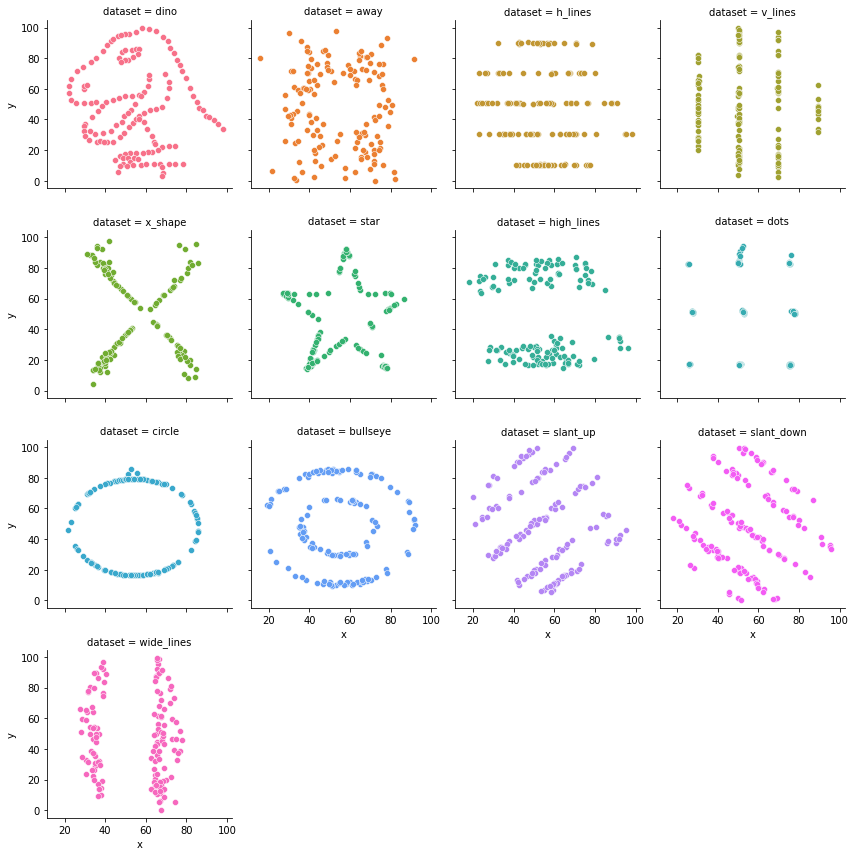

In [ ]:
import seaborn as sns
grid_scatterplots = sns.FacetGrid(data, col="dataset", hue="dataset", col_wrap=4)
grid_scatterplots.map_dataframe(sns.scatterplot, x="x", y="y")

Thirteen data sets with similar statistical properties but with dramatically different appearance. What a fascinating and curious phenomenon! While summary statistics indicated no relationships between the X and Y variables, some of these scatter plots underly more meaningful relationships – especially the lines. 

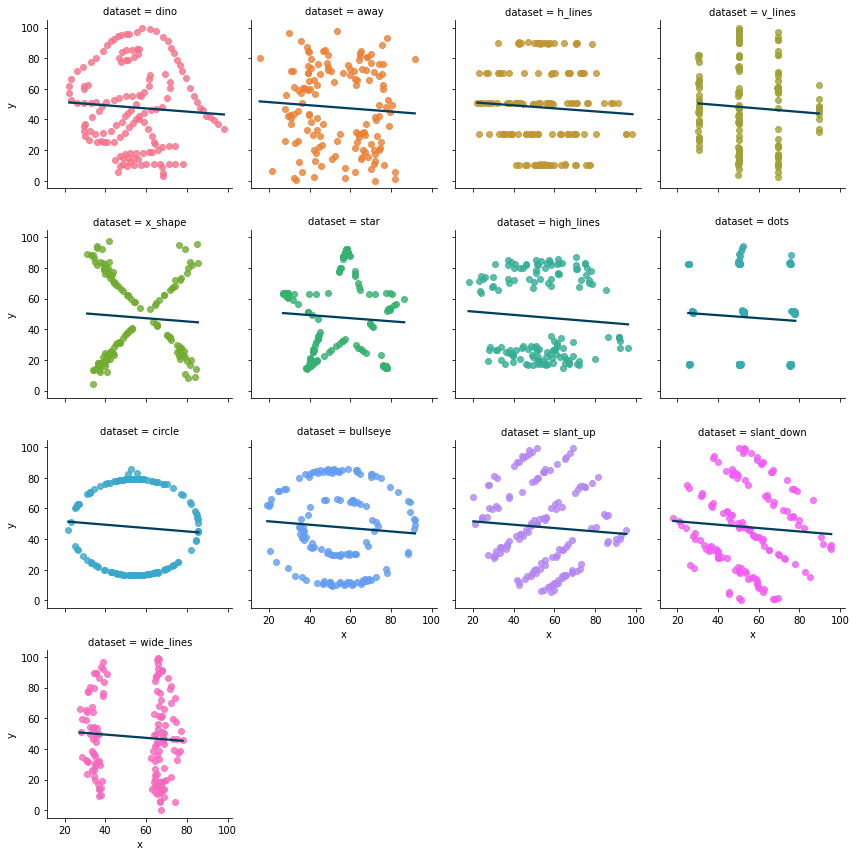

In [ ]:
# Linear Regression fitting using seaborn lmfit function
sns.lmplot(data=data, x="x", y="y", col="dataset", hue="dataset", line_kws={'color': '#003f5c'}, col_wrap=4, ci=None, height=3)

Lets see how to plot two dinosauras looking at each each other.

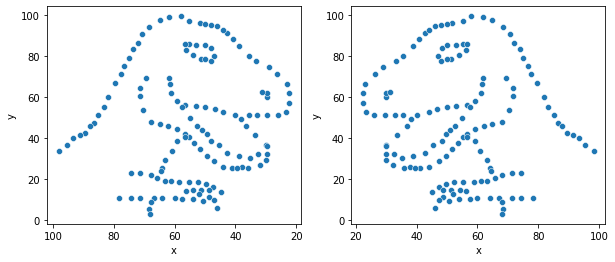

In [ ]:
# Plot the dino dataset and invert the X-axis
import matplotlib.pyplot as plt

data_dino = data[data['dataset']=='dino']

fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.scatterplot(x=data_dino.x, y=data_dino.y, ax=ax[0])
ax[0].invert_xaxis()
sns.scatterplot(x=data_dino.x, y=data_dino.y, ax=ax[1])
fig.show()

# **Introduction to Supervised Learning 1 - Regression**

Welcome to a practical session that will teach you a few basic concepts used across modern machine learning.
The practical assumes prior knowledge of NumPy, as well as basic linear algebra.

**Learning objectives**

This practical is designed to help you see the wood (some basic concepts in supervised learning) from the trees (the ever growing body of approaches).
In this practical you will predict a real-valued output $y$ from a scalar input $x$.
Don't worry, you will encounter multivariate inputs soon.


## **Simple Linear Regression**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import jax
import jax.numpy as jnp

%matplotlib inline
%config InlineBackend.figure_format="retina"

**Let's plot basic data!**

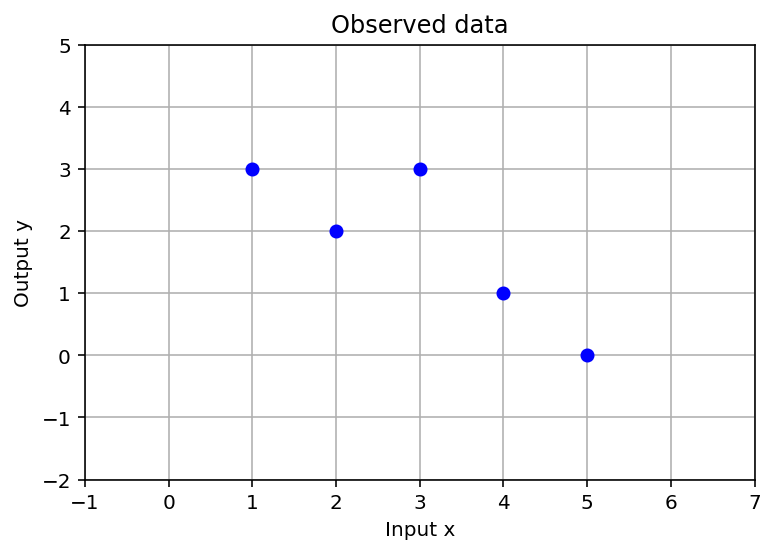

In [ ]:
x_data_list = [1, 2, 3, 4, 5]
y_data_list = [3, 2, 3, 1, 0]

def plot_basic_data(parameters_list=None, title="Observed data"):
  xlim = [-1, 7]
  fig, ax = plt.subplots()
  
  if parameters_list is not None:
    x_pred = np.linspace(xlim[0], xlim[1], 100)
    for parameters in parameters_list:
      y_pred = parameters[0] + parameters[1] * x_pred
      ax.plot(x_pred, y_pred, ':', color=[1, 0.7, 0.6])

    parameters = parameters_list[-1]
    y_pred = parameters[0] + parameters[1] * x_pred
    ax.plot(x_pred, y_pred, "-", color=[1, 0, 0], lw=2)

  ax.plot(x_data_list, y_data_list, "ob")
  ax.set(xlabel="Input x", ylabel="Output y",
         title=title,
         xlim=xlim, ylim=[-2, 5])
  ax.grid()

plot_basic_data()

In [ ]:
parameters_list = []   # A list of parameters for the next exercise.

### **Tuning parameters by hand...**

Above you can see some data points where we have outputs for each input.
We want to predict output $y$ given input values for $x$.
We start by modelling the data with a simple linear function $f(x) = \color{red}{w} x + \color{red}{b}$.
There are two numbers, $\color{red}{b}$ and $\color{red}{w}$, which we call the model's parameters.
If we change them, then $f(x)$ will change accordingly!

Your next challenge is to find a "good" setting of parameters $\color{red}{b}$ and $\color{red}{w}$ by hand.
"But I came here to learn about deep learning!" we hear you say. True.
But we are going to start small, and after this manual exercise, we'll ask you questions about assumptions that you made that you didn't even know you made! Ready? Ready!

**Exercise: Finding two "good" parameters**
1. Move the two sliders below to set $\color{red}{b}$ and $\color{red}{w}$, and press "Run cell" on the code cell below. 
2. Is your $f(x)$ close to the blue data points? Can you find a better fit?
3. Adjust the two sliders a bit more, and press "Run cell" again on the cell...
4. If your $f(x)$ now closer to all the blue data points? Repeat and repeat step 3 until you get a manual fit that you are happy with.

Plotting line -1.16 * x + 5.42


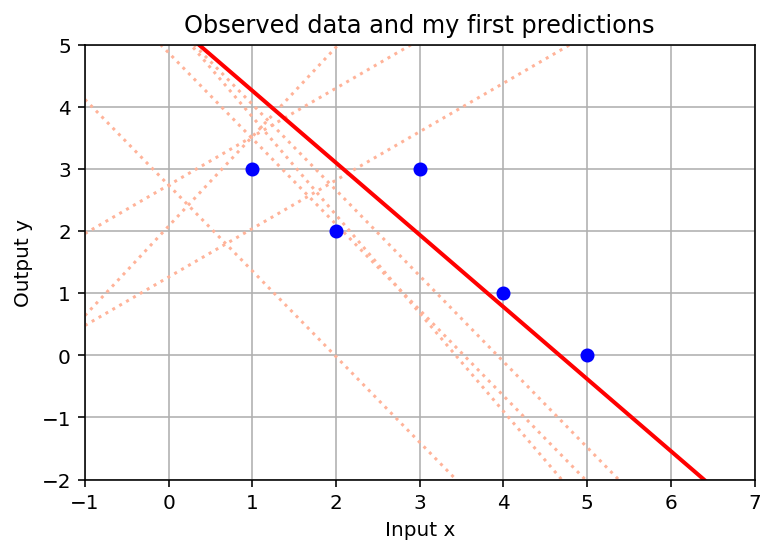

In [ ]:
b = 1.57 #@param {type:"slider", min:-1, max:8, step:0.01}
w = -1.16 #@param {type:"slider", min:-3, max:3, step:0.01}
print("Plotting line", w, "* x +", b)
parameters = [b, w]
parameters_list.append(parameters)
plot_basic_data(parameters_list,
                title="Observed data and my first predictions")

### **Weights and biases**
What happened to the function when you changed $\color{red}{b}$?
And when you changed $\color{red}{w}$? It's the intercept and slope, we hear you say!
We picked notation "$\color{red}{w}$" and "$\color{red}{b}$" for a reason, as our models will become more complicated than linear functions!
- "$\color{red}{w}$" stands for "weight", which is multiplied with $x$ (or in more complicated models, other functions of $x$).
- "$\color{red}{b}$" stands for "bias". It shifts the line up or down in the absence of any data.

###**You're a born optimizer!**

We will now plot your sequence of choices for $\color{red}{b}$ and $\color{red}{w}$ on a $(\color{red}{b}, \color{red}{w})$ axis. Press "run" on the cell below:

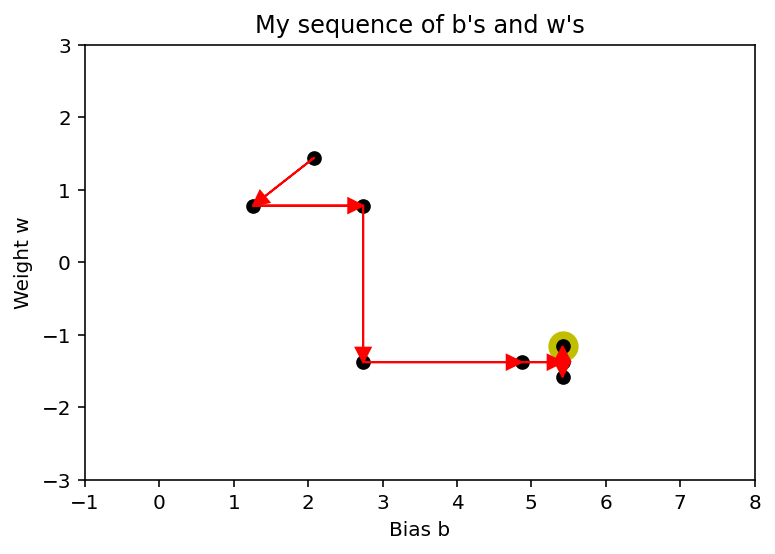

In [ ]:
fig, ax = plt.subplots()
opt = {"head_width": 0.2, "head_length": 0.2,
       "length_includes_head": True, "color": "r"}
if parameters_list is not None:
  b_old = parameters_list[0][0]
  w_old = parameters_list[0][1]
  for i in range(1, len(parameters_list)):
    b_next = parameters_list[i][0]
    w_next = parameters_list[i][1]
    ax.arrow(b_old, w_old, b_next - b_old, w_next - w_old, **opt)
    b_old, w_old = b_next, w_next

  ax.scatter(b_old, w_old, s=200, marker="o", color="y")
  bs = [parameters[0] for parameters in parameters_list]
  ws =  [parameters[1] for parameters in parameters_list]
  ax.scatter(bs, ws, s=40, marker='o', color='k')

ax.set(xlabel="Bias b", ylabel="Weight w",
       title="My sequence of b\'s and w\'s",
       xlim=[-1, 8], ylim=[-3, 3])
plt.show()

### **Is your neighbour a born optimizer?**

Look at the plot of your sequence of choices for $\color{red}{b}$ and $\color{red}{w}$.
Do you notice how they changed? If you're doing this practical in a group, pause here and compare your solution with that of your neighbours:

- Did they change $\color{red}{b}$ and $\color{red}{w}$ with big steps or small steps each time?
- Did they start with small steps, and then progressed to bigger steps? Or the other way round? What about you?
- Did the magnitude of your previous steps influence your next choice? Why? Or why not?
- Did you all converge to roughly the same endpoint for $\color{red}{b}$ and $\color{red}{w}$, or did your sequences end up in different places?

## **Did you make any assumptions?**

Every model makes assumptions. One assumtion that we made is that our model is a *linear* model, i.e. that our best guess is for $y$ is with $f(x) = \color{red}{w} x + \color{red}{b}$.
Turn to your neighbours and tell them how you would approach guessing $\color{red}{b}$ and $\color{red}{w}$ if:
- someone paid you a million dollars if you predicted $y$ correctly at $x = 4.9$, but paid you nothing if you predicted $y$ correctly at $x = 1.1$;
- if one of the entries for $y$ actually contained a typo?

Would your solution change? Why? Or why not?

## **A loss function**

You tweaked two numbers (or parameters), $\color{red}{b}$ and $\color{red}{w}$, to find a good fit.
We want to define a function called a "loss function" that is at its smallest when *you* think the data fit is great, and that is big when the data fit is not so great.

Below, we've created a loss function $\mathrm{loss}(\color{red}{b}, \color{red}{w})$.
Is it small at the best $\color{red}{b}$ and $\color{red}{w}$ that you found manually?
Your sequence of choices for $\color{red}{b}$ and $\color{red}{w}$ are also plotted on the $(\color{red}{b}, \color{red}{w})$ axis.
Does your sequence progressively move toward a parameter setting for which the loss function is small?
We plotted two views of the loss function, so that it is easier to see the minimum *and* the function.

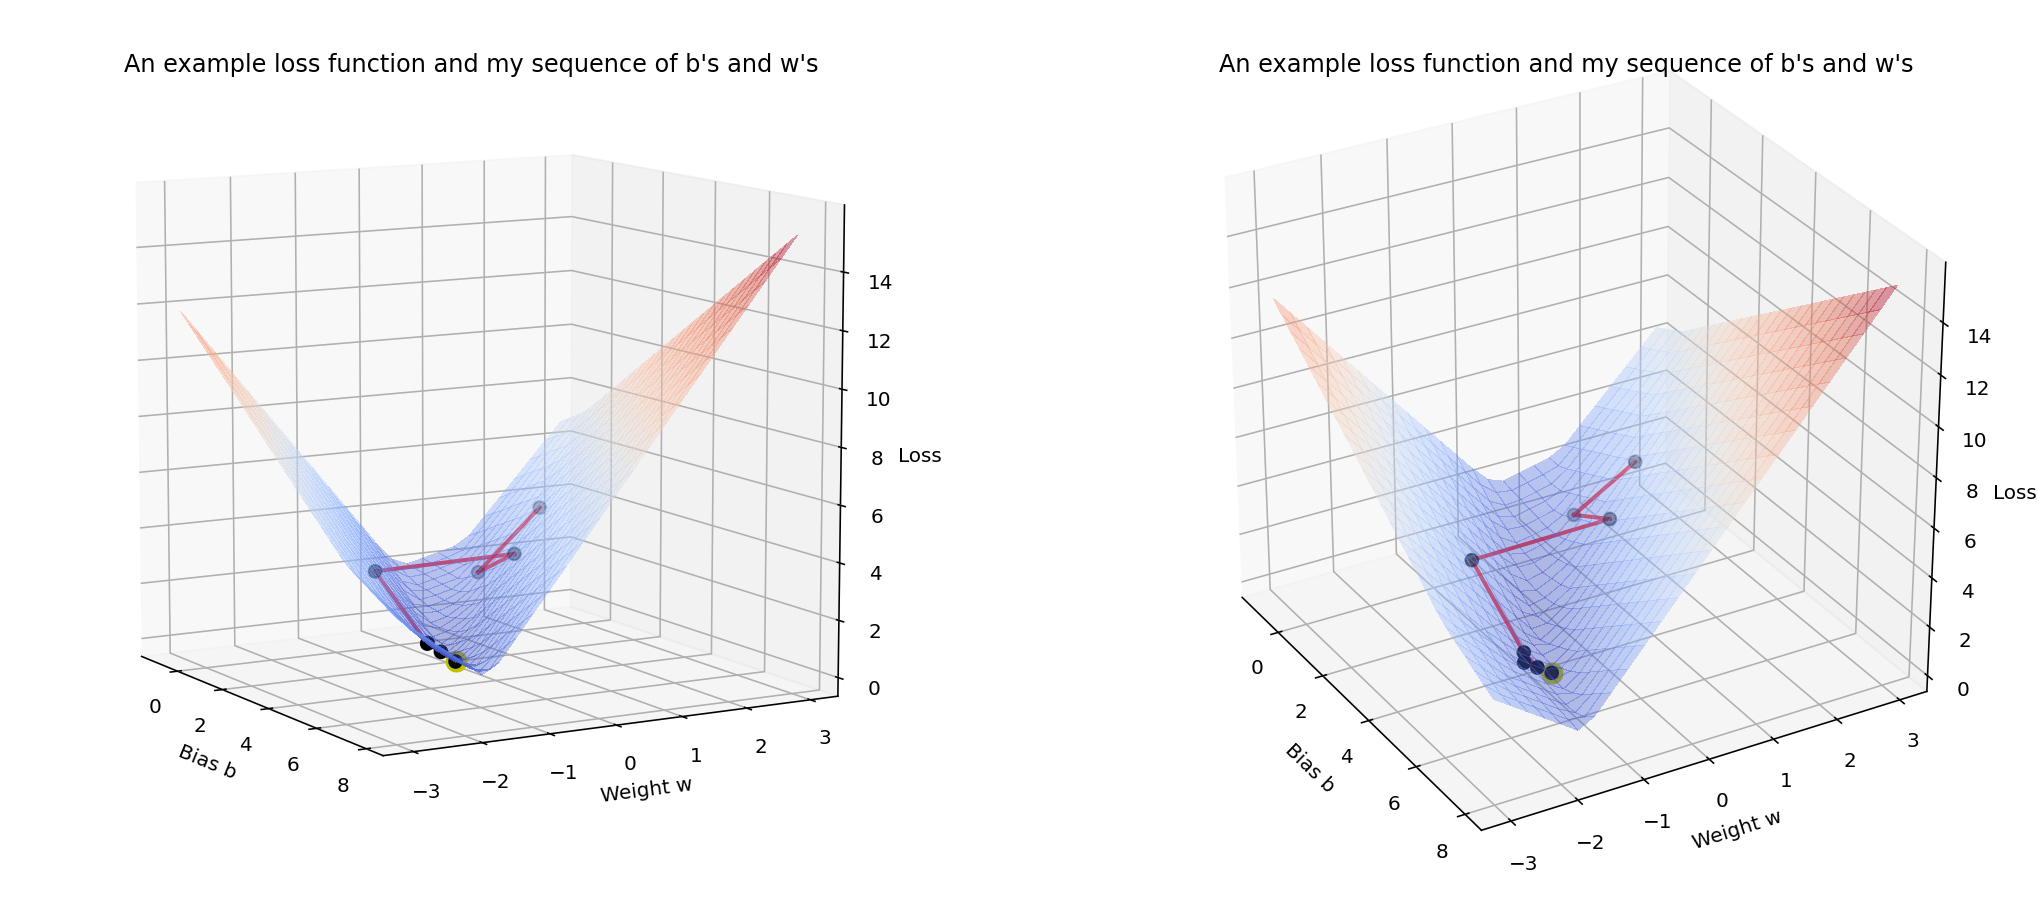

In [ ]:
def l1_loss(b, w):
  loss = 0 * b
  for x, y in zip(x_data_list, y_data_list):
    f = w * x + b
    loss += np.abs(f - y)
  return loss / len(x_data_list)

bs, ws = np.linspace(-1, 8, num=25), np.linspace(-3, 3, num=25)
b_grid, w_grid = np.meshgrid(bs, ws)
loss_grid = l1_loss(b_grid, w_grid)

def plot_loss(parameters_list, title, show_stops=False):
  fig, ax = plt.subplots(1, 2, figsize=(18, 8),
                         subplot_kw={"projection": "3d"})
  ax[0].view_init(10, -30)
  ax[1].view_init(30, -30)

  if parameters_list is not None:
    b_old = parameters_list[0][0]
    w_old = parameters_list[0][1]
    loss_old = l1_loss(b_old, w_old)
    ls = [loss_old]

    for i in range(1, len(parameters_list)):
      b_next = parameters_list[i][0]
      w_next = parameters_list[i][1]
      loss_next = l1_loss(b_next, w_next)
      ls.append(loss_next)

      ax[0].plot([b_old, b_next], [w_old, w_next], [loss_old, loss_next],
                color="red", alpha=0.8, lw=2)
      ax[1].plot([b_old, b_next], [w_old, w_next], [loss_old, loss_next],
                color="red", alpha=0.8, lw=2)
      b_old, w_old, loss_old = b_next, w_next, loss_next

    if show_stops:
      ax[0].scatter(b_old, w_old, loss_old, s=100, marker="o", color="y")
      ax[1].scatter(b_old, w_old, loss_old, s=100, marker="o", color="y")
      bs = [parameters[0] for parameters in parameters_list]
      ws = [parameters[1] for parameters in parameters_list]
      ax[0].scatter(bs, ws, ls, s=40, marker="o", color="k")
      ax[1].scatter(bs, ws, ls, s=40, marker="o", color="k")
    else:
      ax[0].scatter(b_old, w_old, loss_old, s=40, marker='o', color='k')
      ax[1].scatter(b_old, w_old, loss_old, s=40, marker='o', color='k')

  ax[0].plot_surface(b_grid, w_grid, loss_grid, cmap=cm.coolwarm,
                     linewidth=0, alpha=0.4, antialiased=False)
  ax[1].plot_surface(b_grid, w_grid, loss_grid, cmap=cm.coolwarm,
                     linewidth=0, alpha=0.4, antialiased=False)
  ax[0].set(xlabel="Bias b", ylabel="Weight w", zlabel="Loss", title=title)
  ax[1].set(xlabel="Bias b", ylabel="Weight w", zlabel="Loss", title=title)
  plt.show()

plot_loss(parameters_list,
          "An example loss function and my sequence of b\'s and w\'s",
          show_stops=True)

### **Let's contruct a loss function**

When you manually adjusted your weights $\color{red}{b}$ and $\color{red}{w}$, you probably looked at how close each $f(x)$ was to the $y$ that it tries to predict.
Maybe you glanced at the distance from the red line to each of the blue dots, and imagined the average of the distances (marked in purple) below.
If the average was small, your fit was good!

<img src='https://storage.googleapis.com/dm-educational/assets/supervised-learning/loss-function-intro.svg' width='400'>

To formalize this notion, let $x_1 = 1$, $x_2 = 2$, $x_3 = 3$... and let $y_1 = 3$, $y_2 = 2$, $y_3 = 3$... The blue dots are therefore a sequence of input-output $(x, y)$ pairs.
Assuming that the order of the data points doesn't matter, and $n = 1, ..., N$ (where $N=5$ in our case) indexes the data, our loss will look something like this:

$\mathrm{loss}(\color{red}{b}, \color{red}{w}) = \frac{1}{N} \sum_{n=1}^N \mathrm{error}(\color{red}{b}, \color{red}{w} ; x_n, y_n)$.

We take all 5 purple bars (or errors), add them together, and then divide by 5 to get the average amount of purple ink used.
So far, we've said nothing about $\mathrm{error}(\color{red}{b}, \color{red}{w} ; x_n, y_n)$, except that:
- all the error terms depend on $\color{red}{b}$ and $\color{red}{w}$;
- each term only considers one data point $(x_n, y_n)$;
- it doesn't matter in which order we sum the purple bars.

What would you like the "error" to be? Choices, choices! We can just let it be the average of the purple distances,

$\mathrm{loss}(\color{red}{b}, \color{red}{w}) = \frac{1}{N} \sum_{n=1}^N \Big|y_n - \underbrace{(\color{red}{w} x_n + \color{red}{b})}_{f(x_n)} \Big|$.

We can also let the error be the average of the *squared* distances, also called the "mean squared error" (MSE).
We'll write the mean squared error in pencil in light gray for now, as we'll return to that choice later.

$\color{lightgray}{\mathrm{loss}(\color{red}{b}, \color{red}{w}) = \frac{1}{N} \sum_{n=1}^N \Big(y_n - \underbrace{(\color{red}{w} x_n + \color{red}{b})}_{f(x_n)} \Big)^2}$.

**Exercise**

Before we proceed, take a pencil and paper and draw a figure to illustrate the two error terms for one data point.
Let the horizontal axis be $f(x)$ and let the vertical axis be $\mathrm{error}(\color{red}{b}, \color{red}{w} ; x, y)$ for one data point.

- Can you design your own error term? Explain to your neighbour or your tutor the motivation behind your choice.

### **Gradients**

When you manually tweaked $\color{red}{b}$ and $\color{red}{w}$ to adjust the red line, you tried to adjust it so that the fit would be better.
If you were an experienced manual parameter adjuster, you might even have adjusted the $\color{red}{b}$ and $\color{red}{w}$ so that the fit gets *maximally better* with each adjustment.
That notion is the **direction of maximum decrease** of the loss function, or minus the gradient.

Let's take the sum of absolute values, $\mathrm{loss}(\color{red}{b}, \color{red}{w}) = \frac{1}{N} \sum_{n=1}^N |\color{red}{w} x_n + \color{red}{b} - y_n|$.
We want to know in which direction to adjust $\color{red}{b}$ **and** in which direction to adjust $\color{red}{w}$.
We require two gradients,

$\nabla_{\color{red}{b}} \mathrm{loss}(\color{red}{b}, \color{red}{w}) = \frac{1}{N} \sum_{n=1}^N
\begin{cases}
    -1 & \text{if } \color{red}{w} x_n + \color{red}{b} - y_n < 0 \\
    1 & \text{if } \color{red}{w} x_n + \color{red}{b} - y_n \ge 0
\end{cases}$ ,

$\nabla_{\color{red}{w}} \mathrm{loss}(\color{red}{b}, \color{red}{w}) = \frac{1}{N} \sum_{n=1}^N
\begin{cases}
    -x_n & \text{if } \color{red}{w} x_n + \color{red}{b} - y_n < 0 \\
    x_n & \text{if } \color{red}{w} x_n + \color{red}{b} - y_n \ge 0
\end{cases}$ .

*(For the mathematical purists, yes: the gradient of the absolute value is technically not defined at zero, but we'll ignore that technicality for the purposes of finding a minimum for now.)*

In the code snippet below, we compute the two gradients using a for-loop over examples.
This is just to illustrate how the gradient is computed. Very soon, we'll throw away the for-loop over data points and do it "all at once" in vectorized operations!


In [ ]:
def manual_grad(b, w):
  grad_b = 0
  grad_w = 0
  for x, y in zip(x_data_list, y_data_list):
    f = w * x + b
    grad_b += np.sign(f - y)
    grad_w += np.sign(f - y) * x
  grad_b /= len(x_data_list)
  grad_w /= len(x_data_list)
  return grad_b, grad_w

### **Gradient descent: No more tuning parameters by hand!**

To get to the minimum of the loss function -- which hopefully gives us the data fit we want -- we want to repeatedly use the gradients to tweak the parameters $\color{red}{b}$ and $\color{red}{w}$ in the right direction.
But how? That opens a whole direction of research! The simplest idea is to start with an initial guess $\color{red}{b}$, and then repeatedly update

$\color{red}{b} \leftarrow \color{red}{b} - \color{blue}{\eta} \nabla_{\color{red}{b}} \mathrm{loss}(\color{red}{b}, \color{red}{w})$ ,

while also doing the same for $\color{red}{w}$.
The parameter $\color{blue}{\eta}$ just tells us how much we are going to scale the gradient before we use it to update our parameters:
are we going to try to walk downhill with big steps or small steps?
It is called a **learning rate**.

**Exercise**
1. Run the code snippet below, and note the $(\color{red}{b}, \color{red}{w})$ trajectory as we use the gradient to (try to) get to the minimum.
2. Adjust the starting values for $\color{red}{b}$ or $\color{red}{w}$ or the value of $\color{blue}{\eta}$ and see how the resulting trajectory to the minimum changes.
3. Can you find a setting for $\color{blue}{\eta}$ where things start spiralling out of control and the loss gets bigger and bigger (and not smaller)?
4. Can you find a setting for $\color{blue}{\eta}$ so that we're still far away from the minimum after `200` parameter update steps?

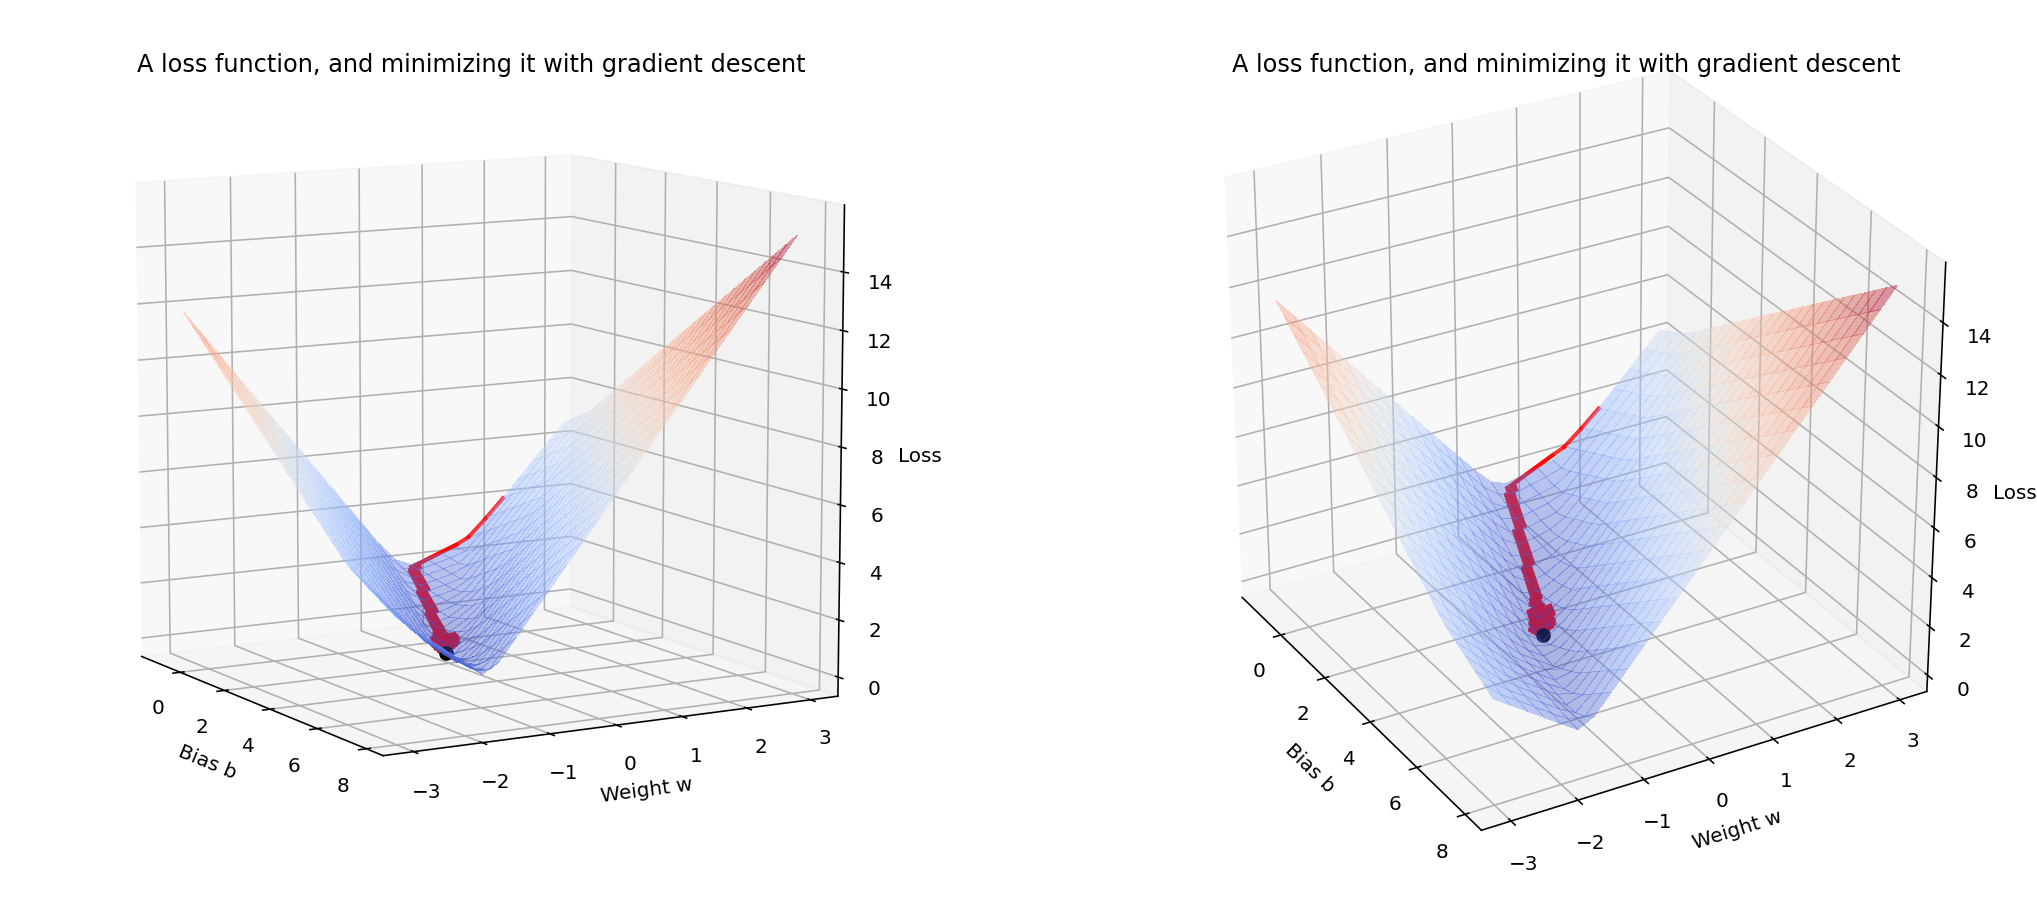

In [ ]:
b = -1                # Change me! Try 2, 7
w = 2                # Change me! Try -1, -2
learning_rate = 0.1   # Change me! Try 0.01, 0.5, ...

parameters_step_list = []

for _ in range(200):
  parameters_step_list.append([b, w]) 
  grad_b, grad_w = manual_grad(b, w)
  b = b - learning_rate * grad_b
  w = w - learning_rate * grad_w

plot_loss(parameters_step_list,
          "A loss function, and minimizing it with gradient descent")

### **Autodiff: No more manual gradients!**

You don't need to do the above calculations yourself thanks to automatic differentiation, or "autodiff"!
While you can probably derive and code the gradients of the loss function for our linear model without making a mistake somewhere, getting the gradients right for more complex models can be much more work. Much, much more work!
Before we introduce autodiff, you should spare a thought for the generations of machine learning researchers who did amazing work without it ;-)

Here is autodiff in action in the lines of code below. We contruct a function called `auto_grad`,

`auto_grad = jax.grad(loss_function, argnums=(0, 1))`

and call it in the same way as we called `manual_grad`.

In [ ]:
x = np.array(x_data_list)
y = np.array(y_data_list)

def loss_function(b, w):
  f = w * x + b
  errors = jnp.abs(y - f)
  # Instead of summing over individual data points in a for-loop, and then
  # dividing to get the average, we do it in one go. No more for-loops!
  return jnp.mean(errors)

# This is it! One line of code.
auto_grad = jax.grad(loss_function, argnums=(0, 1))

# Let's see if it works. Does auto_grad match our manual version?
b, w = 2.0, 3.0

grad_b, grad_w = auto_grad(b, w)
print("Autograd         grad_b:", grad_b, "  grad_w", grad_w)

grad_b, grad_w = manual_grad(b, w)
print("Manual gradients grad_b:", grad_b, "  grad_w", grad_w)

Autograd         grad_b: 1.0   grad_w 3.0
Manual gradients grad_b: 1.0   grad_w 3.0


## **Multiple Linear Regression** 

*The effect of temperature and reaction time affects the % yield. The data collected in given in the Mult-Reg_Yield file. Develop a model for % yield in terms of temperature and time?*

In [ ]:
# Import packages
from google.colab import files
import io
import pandas as pd
from scipy import stats
import matplotlib.pyplot as myplot
import math as mymath
from pandas.plotting import scatter_matrix
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
uploaded = files.upload()

Saving Mult_Reg_Yield.csv to Mult_Reg_Yield.csv


In [ ]:
mydata = pd.read_csv(io.BytesIO(uploaded['Mult_Reg_Yield.csv']))
mydata.head()

,Time,Temperature,Yield
0,130,190,35.0
1,174,176,81.7
2,134,205,42.5
3,191,210,98.3
4,165,230,52.7


In [ ]:
time = mydata.Time
temp = mydata.Temperature
output = mydata["Yield"]

In [ ]:
#Regression Output
mymodel = ols("output ~ time + temp", mydata).fit()
mymodel.summary()

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 output   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     27.07
Date:                Fri, 03 Feb 2023   Prob (F-statistic):           2.32e-05
Time:                        11:01:42   Log-Likelihood:                -59.703
No. Observations:                  16   AIC:                             125.4
Df Residuals:                      13   BIC:                             127.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -67.8844     40.587     -1.673      0.118    -155.566      19.797
time           0.9061      0.123      7.344      0.000       0.640       1.173
temp          -0.0642      0.164     -0.392      0.702      -0.418       0.290
==============================================================================
Omnibus:                        1.984   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                0.970
Skew:                          -0.078   Prob(JB):                        0.616
Kurtosis:                       1.804   Cond. No.                     3.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Residuals Analysis
pred = mymodel.predict()
res = output - pred

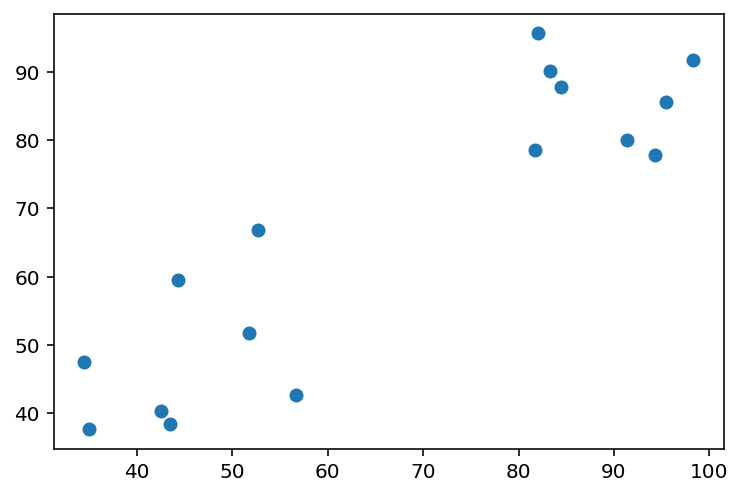

In [ ]:
# Plot showing Actual vs Fitted values
myplot.scatter(output, pred)
myplot.show()

*There need to be strong positive correlation between actual and fitted response*

In [ ]:
# Calculate MSE & RMSE
res_sq = res**2
mse = res_sq.mean()
print(mse)
rmse = mymath.sqrt(mse)
print(rmse)

102.00508614219636
10.099756736783137
